# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&Appid=" + api_key
cityname = []
city_data = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []


count = 1
for city in cities:
    city_url = url + '&q='+ city
    try:
        response = requests.get(city_url).json()
        cityname.append(response['name'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        name = response['name']
        print(f"Processing Record {count} | {name}")
        
        count = count + 1
        
    except:
        print("No City Found")
    continue

Processing Record 1 | Hithadhoo
Processing Record 2 | Hanzhong
No City Found
Processing Record 3 | Iqaluit
Processing Record 4 | Albany
Processing Record 5 | Sampit
Processing Record 6 | Yerbogachen
Processing Record 7 | Provideniya
Processing Record 8 | Mions
Processing Record 9 | Tuktoyaktuk
Processing Record 10 | Port Elizabeth
No City Found
Processing Record 11 | Dikson
Processing Record 12 | Saint-Raymond
Processing Record 13 | Butaritari
Processing Record 14 | Seymchan
Processing Record 15 | Paamiut
Processing Record 16 | Belaya Gora
No City Found
Processing Record 17 | Zaysan
No City Found
Processing Record 18 | Busselton
No City Found
Processing Record 19 | Yellowknife
Processing Record 20 | Saint-Philippe
Processing Record 21 | Bereda
Processing Record 22 | Hermanus
Processing Record 23 | Chokurdakh
Processing Record 24 | Ushuaia
Processing Record 25 | Mokolo
Processing Record 26 | Lavrentiya
Processing Record 27 | Hofn
Processing Record 28 | Mar del Plata
No City Found
Proces

Processing Record 236 | Wladyslawowo
Processing Record 237 | Prince George
Processing Record 238 | Dutse
Processing Record 239 | Olavarria
Processing Record 240 | Geraldton
Processing Record 241 | New Norfolk
No City Found
Processing Record 242 | Ambon
Processing Record 243 | Ambilobe
No City Found
Processing Record 244 | Quatre Cocos
No City Found
Processing Record 245 | Alugan
Processing Record 246 | Aksha
Processing Record 247 | Montlucon
Processing Record 248 | Zanjan
Processing Record 249 | Ust-Omchug
Processing Record 250 | Malmesbury
Processing Record 251 | Salinopolis
Processing Record 252 | Teya
Processing Record 253 | Makat
Processing Record 254 | Tomatlan
Processing Record 255 | Sapouy
Processing Record 256 | Savelugu
Processing Record 257 | Okhotsk
Processing Record 258 | Pangnirtung
Processing Record 259 | Gorlev
Processing Record 260 | Ancud
Processing Record 261 | Topolovgrad
Processing Record 262 | Muros
Processing Record 263 | Lata
Processing Record 264 | Katsuura
Proc

Processing Record 472 | Chapais
Processing Record 473 | Newport Beach
Processing Record 474 | Atar
Processing Record 475 | Atambua
Processing Record 476 | Chanute
Processing Record 477 | Imamoglu
Processing Record 478 | Liku
Processing Record 479 | Pahrump
Processing Record 480 | Maceio
Processing Record 481 | Itupiranga
Processing Record 482 | Piacabucu
Processing Record 483 | Kawhia
Processing Record 484 | Kamenka
Processing Record 485 | Podgornoye
Processing Record 486 | Aldan
Processing Record 487 | Portland
Processing Record 488 | Tura
Processing Record 489 | Kiama
Processing Record 490 | Tsumeb
Processing Record 491 | Yendi
Processing Record 492 | Normal
Processing Record 493 | Bandarbeyla
Processing Record 494 | Hasaki
Processing Record 495 | Brookhaven
Processing Record 496 | Argentan
Processing Record 497 | Guantanamo
Processing Record 498 | Olga
Processing Record 499 | Astoria
Processing Record 500 | Proletarsk
No City Found
Processing Record 501 | Norman Wells
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dic = {'City':cityname,
        'Cloudiness':cloudiness,
        'Country':country,
        'Date':date,
        'Humidity':humidity,
        'Lat':latitude,
        'Lng':longitude,
        'Max Temp':max_temp,
        'Wind Speed':wind_speed}

weather_df = pd.DataFrame(weather_dic)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,100,MV,1566857320,71,-0.60,73.08,82.45,5.61
1,Hanzhong,100,CN,1566857320,88,33.08,107.03,67.51,2.21
2,Iqaluit,90,CA,1566857320,87,63.75,-68.52,51.80,10.29
3,Albany,1,US,1566857103,49,42.65,-73.75,78.80,5.82
4,Sampit,100,ID,1566857320,99,-2.54,112.95,72.73,1.12


In [7]:
weather_df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [8]:
weather_df.to_csv("weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

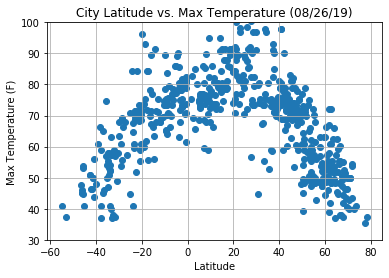

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")
plt.title("City Latitude vs. Max Temperature (08/26/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(30,100)
plt.grid(True)

#### Latitude vs. Humidity Plot

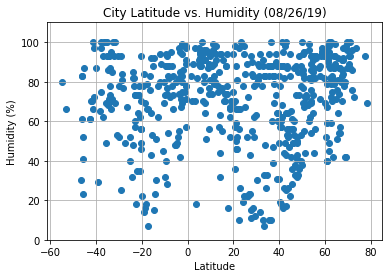

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity (08/26/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0,110)
plt.grid(True)

#### Latitude vs. Cloudiness Plot

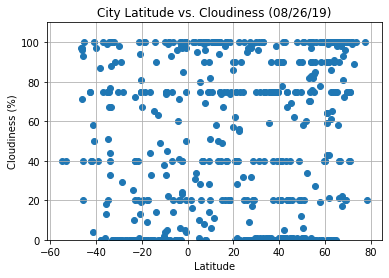

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness (08/26/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(0,110)
plt.grid(True)

#### Latitude vs. Wind Speed Plot

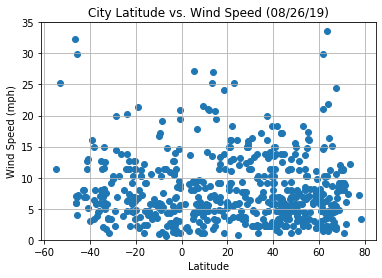

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed (08/26/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(0,35)
plt.grid(True)

Three observations/trends:
The highest temperature occured at a latitude of 20.
Humidity and wind speed are not affected by latitude.
cloudiness has no coorelation with latitude is all over the place.